In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
import cv2
from sklearn.model_selection import train_test_split
from tensorflow import keras
from skimage import io
#from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
#import keras
#from keras.models import load_model
#from keras.utils import CustomObjectScope
#from keras.initializers import glorot_uniform

In [14]:
tf.__version__

'2.0.0'

Image1[1]



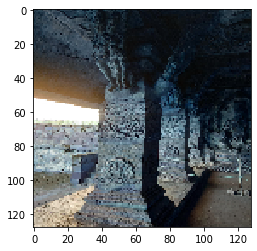

[1]


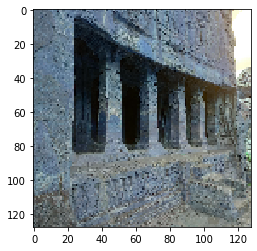

[1]


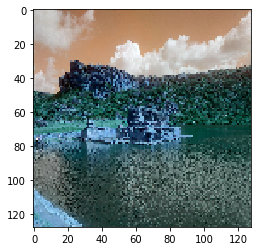

[1]


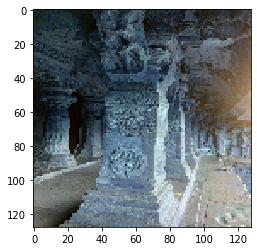

In [15]:
images1 = []
label = []
testimages1 = []
class_names = ["Ibrahim Roza", "Badami", "Bara Kaman", "Gol Gumbaz"]
files=glob.glob("train/Badami/*.jpg")

for file in files:     
    #image1 = io.imread(file, as_gray=True)
    image1=cv2.imread(file) 
    resized_image = cv2.resize(image1, (128, 128))
    images1.append(resized_image)      
    label.append([1])

print("Image1[1]\n")
plt.imshow(images1[1])       
plt.show()





files=glob.glob("train/Bara kaman/*.jpg")

for file in files:               
    #image1 = io.imread(file, as_gray=True)
    image1=cv2.imread(file) 
    resized_image = cv2.resize(image1, (128, 128))
    images1.append(resized_image)      
    label.append([2])

print(label[20])
plt.imshow(images1[20])       
plt.show()

files=glob.glob("train/Gol Gumbaz/*.jpg")

for file in files:    
    #image1 = io.imread(file, as_gray=True)
    image1=cv2.imread(file) 
    resized_image = cv2.resize(image1, (128, 128))
    images1.append(resized_image)      
    label.append([3])

print(label[30])
plt.imshow(images1[30])       
plt.show()


files=glob.glob("train/Ibrahim roza/*.jpg")

for file in files:  
    #image1 = io.imread(file, as_gray=True)
    image1=cv2.imread(file) 
    resized_image = cv2.resize(image1, (128, 128))
    images1.append(resized_image)      
    label.append([0])

print(label[40])
plt.imshow(images1[40])       
plt.show()

files=glob.glob("test/*.jpg")

for file in files:  
    #image1 = io.imread(file, as_gray=True)
    testimage1=cv2.imread(file) 
    resized_image = cv2.resize(testimage1, (128, 128))
    testimages1.append(resized_image)      
    #testlabel.append([0])


testimages2 = np.array(testimages1)
images2=np.array(images1)
label2=np.array(label)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(images2,label2,test_size = 0.2,random_state = 5)

In [17]:
X_test.shape

(251, 128, 128, 3)

In [18]:
y_train

array([[1],
       [1],
       [1],
       ...,
       [2],
       [1],
       [2]])

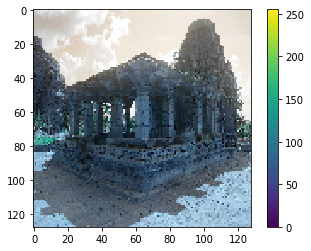

In [19]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [20]:
X_train = X_train / 255.0  #normalize
X_test = X_test / 255.0
testimages2 = testimages2 / 255.0


/home/prajj/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


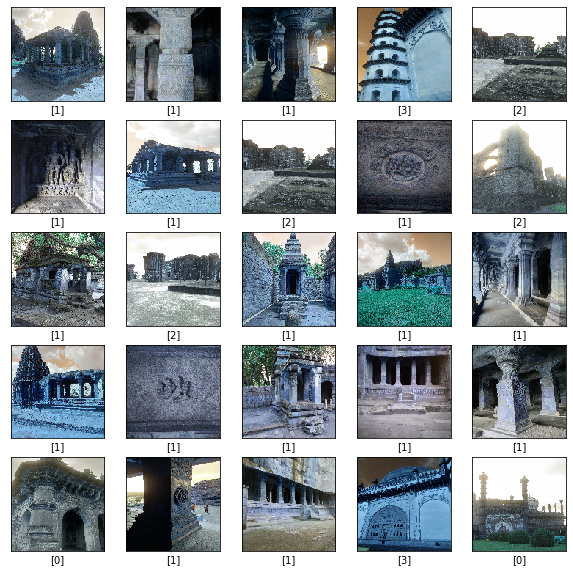

In [21]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
    plt.xlabel(y_train[i])

In [27]:

model = keras.Sequential()
#model = tensorflow.keras.Sequential()
#model.add(vgg_model.layers[0])
model.add(layers.Conv2D(128, (3, 3), padding = 'same', activation='relu', input_shape=(128, 128, 3), use_bias = True))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', use_bias = True))


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 128, 128, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 64)        36928     
Total params: 114,304
Trainable params: 114,304
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))


In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 128, 128, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [31]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))


Train on 1001 samples, validate on 251 samples
Epoch 1/10
1001/1001 [==============================] - 62s 62ms/sample - loss: 0.9685 - accuracy: 0.6374 - val_loss: 0.7351 - val_accuracy: 0.7251
Epoch 2/10
1001/1001 [==============================] - 60s 60ms/sample - loss: 0.5583 - accuracy: 0.7962 - val_loss: 0.4699 - val_accuracy: 0.8247
Epoch 3/10
1001/1001 [==============================] - 60s 60ms/sample - loss: 0.2930 - accuracy: 0.8931 - val_loss: 0.3072 - val_accuracy: 0.9243
Epoch 4/10
1001/1001 [==============================] - 61s 61ms/sample - loss: 0.1550 - accuracy: 0.9491 - val_loss: 0.5072 - val_accuracy: 0.8725
Epoch 5/10
1001/1001 [==============================] - 61s 60ms/sample - loss: 0.1485 - accuracy: 0.9421 - val_loss: 0.5151 - val_accuracy: 0.8406
Epoch 6/10
1001/1001 [==============================] - 62s 62ms/sample - loss: 0.0872 - accuracy: 0.9740 - val_loss: 0.2889 - val_accuracy: 0.9402
Epoch 7/10
1001/1001 [==============================] - 61s 61ms/

251/1 - 4s - loss: 0.1582 - accuracy: 0.9363


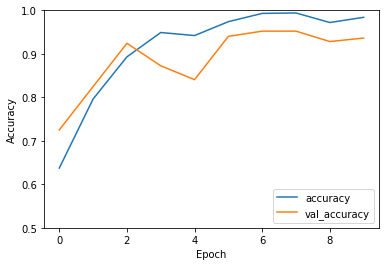

In [32]:
#model.fit(X_train,y_train,epochs = 15)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)


In [33]:
print('Test Accuracy: ',test_acc)

Test Accuracy:  0.936255


In [ ]:
#print()

#imagehere = cv2.imread('test/*.jpg')
#imagehere = 

pred = model.predict(testimages2)


class_names[np.argmax(pred[2])]
for i in range (0,testimages2.shape[0]):
    #print(label[30])
    plt.imshow(testimages2[i])       
    plt.show()
    print(class_names[np.argmax(pred[i])])

#print(class_names[no.argmax(pred)])

In [ ]:

#model.save('my_model2.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
#model = load_model('my_model2.h5')
#with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
 #   model = load_model('my_model2.h5')
    
        

In [84]:

testimages3 = []
testimages1 = []
files=glob.glob("test/*.jpg")
print(len(files))

for file in files:  
    #image1 = io.imread(file, as_gray=True)
    testimage1=cv2.imread(file) 
    resized_image = cv2.resize(testimage1, (128, 128))
    testimages1.append(resized_image)   
    
    #testlabel.append([0])


testimages3 = np.array(testimages1)
#images2=np.array(images1)
#label2=np.array(label)
testimages3.shape

7


(7, 128, 128, 3)

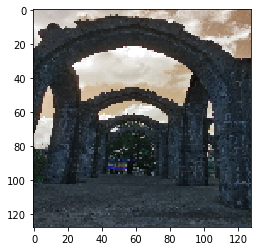

In [85]:
plt.imshow(testimages3[0])       
plt.show()


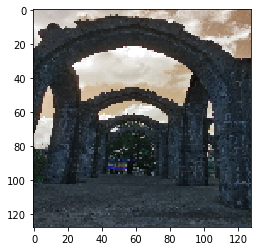

0.9978435
Bara Kaman
[1.3658277e-03 7.4531278e-04 9.9784350e-01 4.5262768e-05]


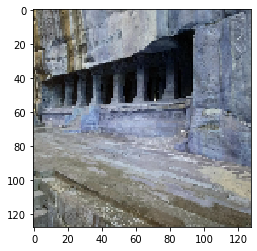

0.9999993
Badami
[1.0708026e-07 9.9999928e-01 1.8597993e-09 5.8109509e-07]


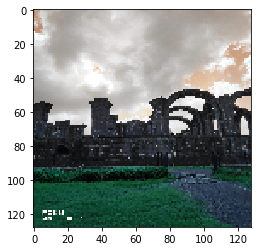

0.9983834
Bara Kaman
[3.8853771e-04 1.1957628e-03 9.9838340e-01 3.2198084e-05]


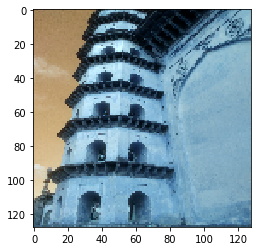

1.0
Gol Gumbaz
[8.4508373e-12 4.9851629e-08 2.3532307e-15 1.0000000e+00]


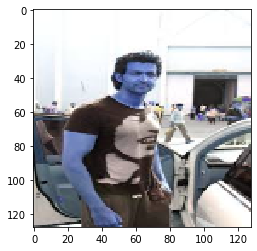

Negative Class Image
[0.2520768  0.00124436 0.7410166  0.00566225]


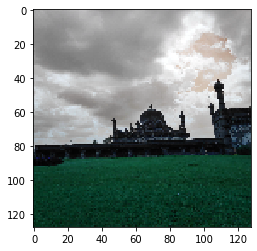

0.92466265
Bara Kaman
[0.07194801 0.00218086 0.92466265 0.00120847]


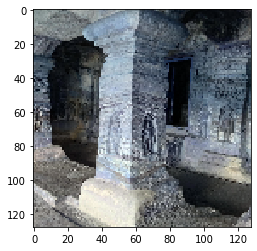

1.0
Badami
[6.8270842e-09 1.0000000e+00 1.7606642e-11 9.7364050e-10]


In [83]:
testimages3 = testimages3 / 255.0

pred = model.predict(testimages3)
#pred

#class_names[np.argmax(pred[2])]
for i in range (0,testimages3.shape[0]):
    #print(label[30])
    plt.imshow(testimages3[i])       
    plt.show()
    if  max(pred[i]) > 0.75:
        #print(max(pred[i]))
        print(class_names[np.argmax(pred[i])])
        print(pred[i])
    else:
        print("Negative Class Image")
        print(pred[i])
    
            
    
